# YouTube Exporatory Data Analysis

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv("drive/MyDrive/YouTube_EDA/youtube_recommendation_dataset -.csv")

# Display the data
print("First 5 rows:")
print(df.head())

# Display info
print("\nInfo:")
print(df.info())

# Display summary statistics
print("\nDescribe:")
print(df.describe())

# Check the data for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
                                               Title       channel_title  \
0  LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...  AlofokeMusicSounds   
1                            Moana | Official Teaser              Disney   
2  $0 - $1 Trillion Only FISHING in Steal a Brain...          CaylusBlox   
3               ALLDAY PROJECT - ‘ONE MORE TIME’ M/V       THEBLACKLABEL   
4      La Lupa | Vendetta Hero Trailer | Overwatch 2       PlayOverwatch   

                published_at  category_id  view_count  like_count  \
0  2025-11-16 15:34:55+00:00           10     1405647      140463   
1  2025-11-17 17:00:47+00:00           24     2776847       26801   
2  2025-11-17 22:57:14+00:00           20     1189857       16174   
3  2025-11-17 09:00:07+00:00           10     5319161           0   
4  2025-11-17 17:00:06+00:00           20      597542       41742   

   comment_count  favorite_count duration definition  caption  \
0           9063               0  PT1M51S        

In [4]:
# Convert 'published_at' to 'datetime'
df['published_at'] = pd.to_datetime(df['published_at'])

# Drop 'favorite_count' if all zeros
if df['favorite_count'].sum() == 0:
  df = df.drop(columns=['favorite_count'])

In [5]:
print(df.head())

                                               Title       channel_title  \
0  LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...  AlofokeMusicSounds   
1                            Moana | Official Teaser              Disney   
2  $0 - $1 Trillion Only FISHING in Steal a Brain...          CaylusBlox   
3               ALLDAY PROJECT - ‘ONE MORE TIME’ M/V       THEBLACKLABEL   
4      La Lupa | Vendetta Hero Trailer | Overwatch 2       PlayOverwatch   

               published_at  category_id  view_count  like_count  \
0 2025-11-16 15:34:55+00:00           10     1405647      140463   
1 2025-11-17 17:00:47+00:00           24     2776847       26801   
2 2025-11-17 22:57:14+00:00           20     1189857       16174   
3 2025-11-17 09:00:07+00:00           10     5319161           0   
4 2025-11-17 17:00:06+00:00           20      597542       41742   

   comment_count duration definition  caption  engagement_rate  \
0           9063  PT1M51S         hd    False         0.106375   
1 

Univariate Analysis

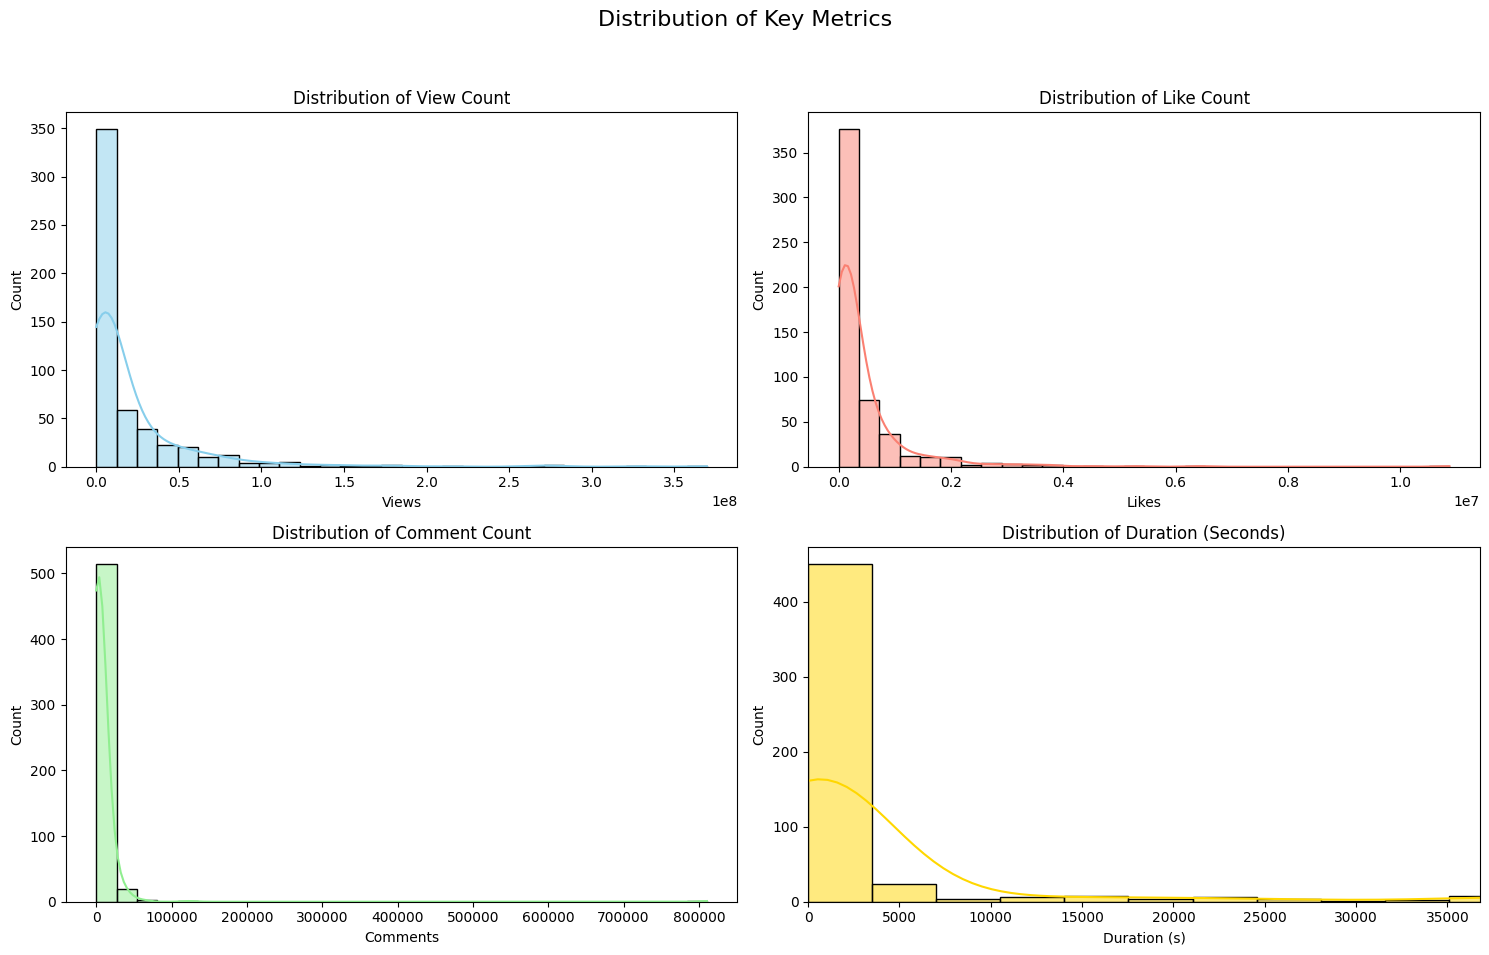

In [6]:
# 1. Distribution of Numerical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Metrics', fontsize=16)

sns.histplot(df['view_count'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of View Count')
axes[0, 0].set_xlabel('Views')

sns.histplot(df['like_count'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Like Count')
axes[0, 1].set_xlabel('Likes')

sns.histplot(df['comment_count'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Comment Count')
axes[1, 0].set_xlabel('Comments')

sns.histplot(df['duration_seconds'], bins=30, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of Duration (Seconds)')
axes[1, 1].set_xlabel('Duration (s)')
axes[1, 1].set_xlim(0, df['duration_seconds'].quantile(0.95))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

/tmp/ipython-input-3060694613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_id', data=df, ax=axes[0], palette='viridis', order=df['category_id'].value_counts().index)
/tmp/ipython-input-3060694613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='caption', data=df, ax=axes[1], palette='pastel')


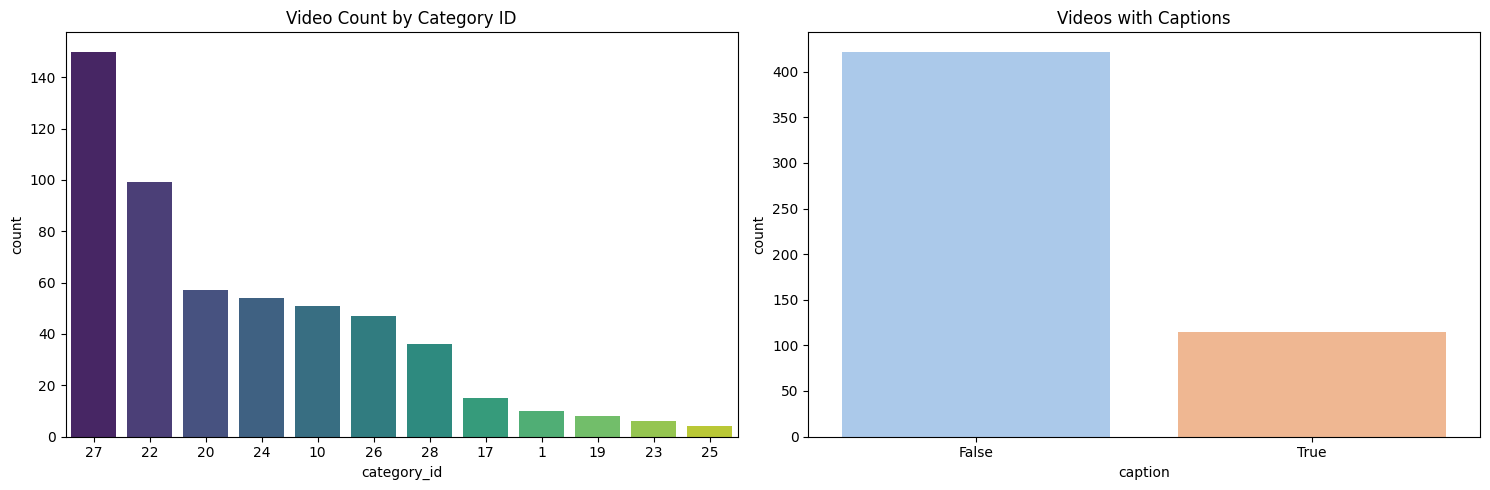

In [7]:
# 2. Categorical Counts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='category_id', data=df, ax=axes[0], palette='viridis', order=df['category_id'].value_counts().index)
axes[0].set_title('Video Count by Category ID')

sns.countplot(x='caption', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Videos with Captions')

plt.tight_layout()

Bivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

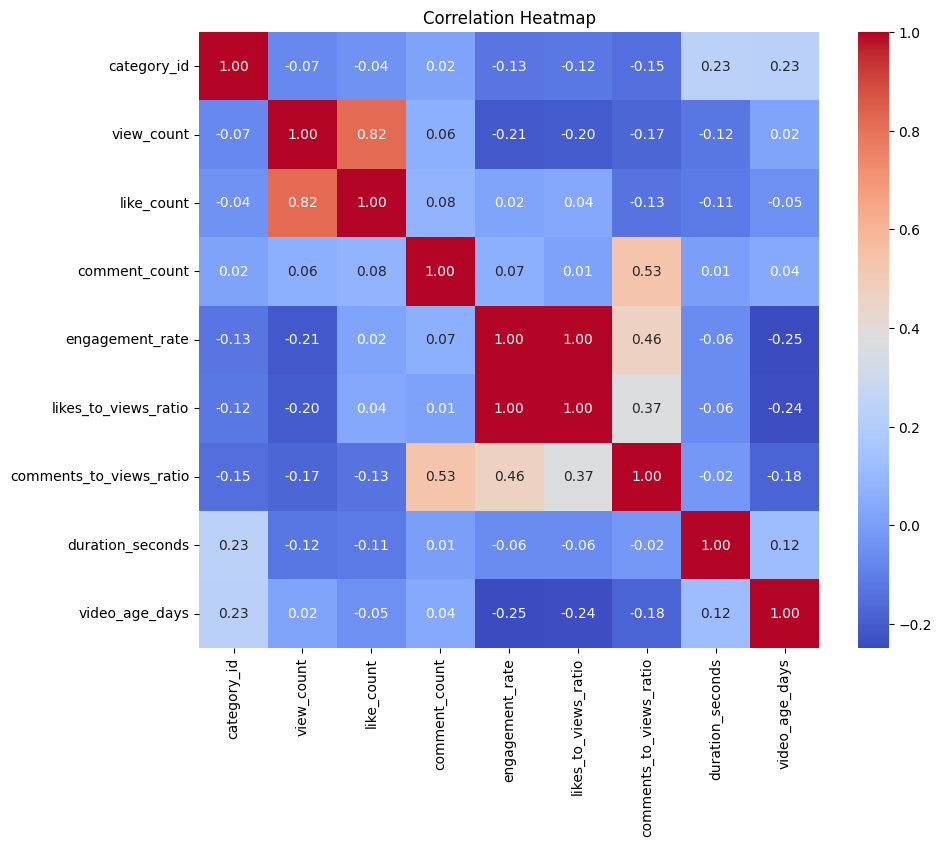

In [8]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

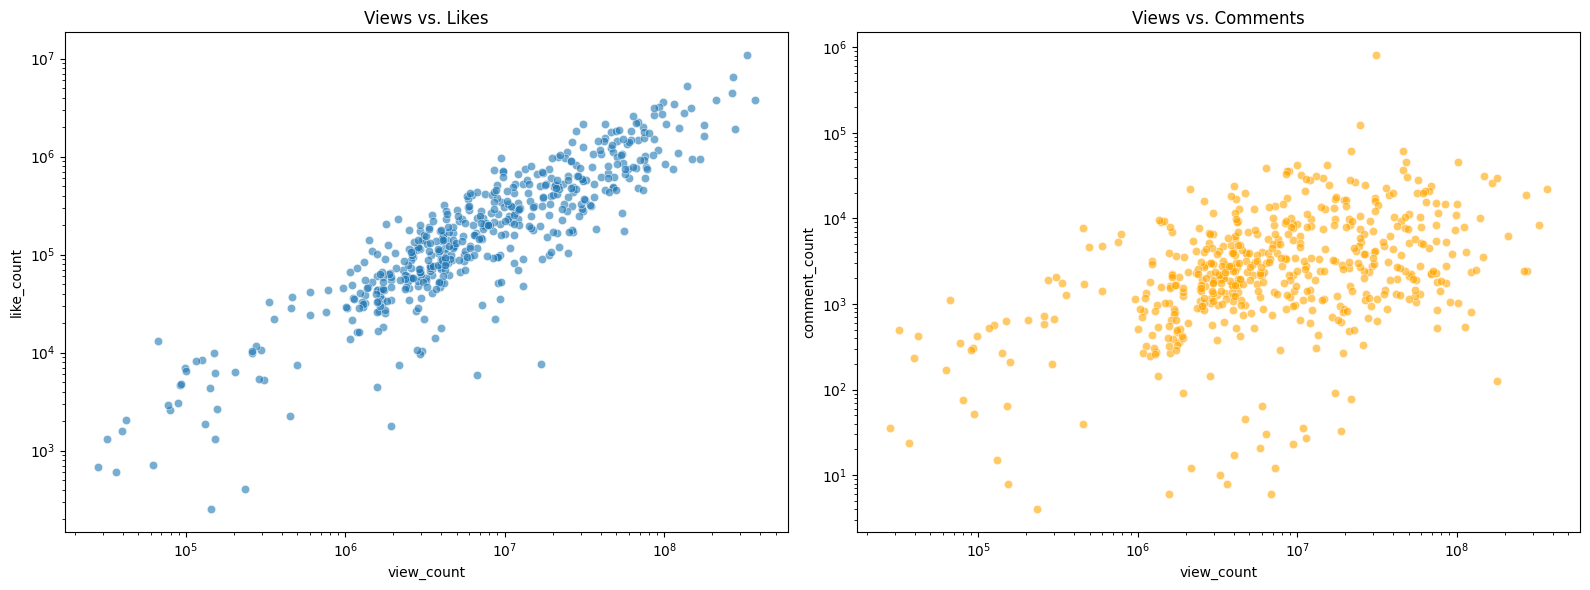

In [9]:
# 4. Scatter Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='view_count', y='like_count', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title('Views vs. Likes')
axes[0].set_xscale('log') # Log scale for better visualization
axes[0].set_yscale('log')

sns.scatterplot(x='view_count', y='comment_count', data=df, ax=axes[1], alpha=0.6, color='orange')
axes[1].set_title('Views vs. Comments')
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.tight_layout()

/tmp/ipython-input-3756253127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_id', y='view_count', data=df, palette='Set2')


Text(0.5, 1.0, 'View Count Distribution by Category')

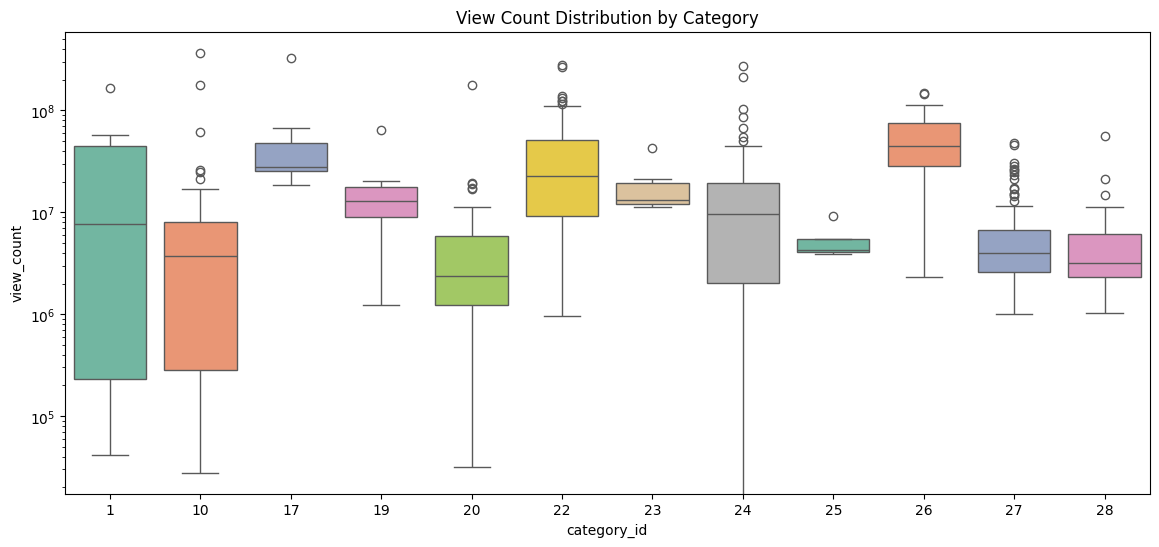

In [10]:
# 5. Boxplots by Category
plt.figure(figsize=(14, 6))
sns.boxplot(x='category_id', y='view_count', data=df, palette='Set2')
plt.yscale('log')
plt.title('View Count Distribution by Category')

Time Series Analysis

/tmp/ipython-input-3095297987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_year', data=df, palette='magma')


Text(0.5, 1.0, 'Number of Videos Published by Year')

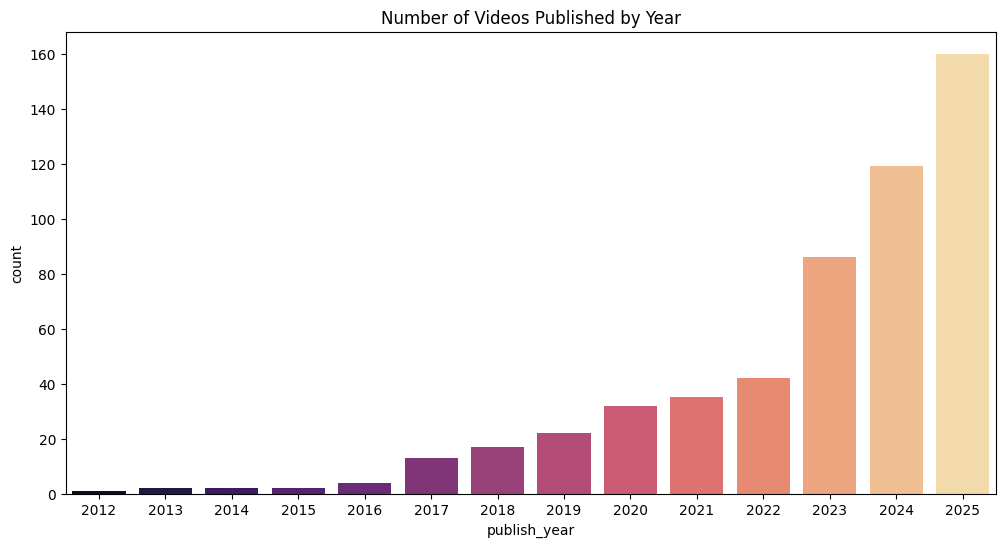

In [11]:
# Time Series Analysis
df['publish_year'] = df['published_at'].dt.year
df['publish_month'] = df['published_at'].dt.month_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='publish_year', data=df, palette='magma')
plt.title('Number of Videos Published by Year')

**Introduction & Data Overview**

This dataset contains information on YouTube videos, including engagement metrics (views, likes, comments), metadata (duration, definition, captions), and publish dates.

**Objective:**
To analyze factors that influence video popularity and engagement.

**Dataset Summary:**

* **Records:** 537 videos

* **Missing Values:** None

* **Key Features:** `view_count`, `like_count`, `comment_count`, `category_id`, `published_at`, `duration_seconds`

* **Note:** `favorite_count` was removed because it contained only zeros.

**Univariate Analysis**

**Engagement Metrics**

View, like, and comment counts are strongly right-skewed:

* Most videos have modest engagement.

* A small number reach extremely high view counts.

* Video durations are typically under 600 seconds, though a long tail of longer videos exists.

Log transformations would better capture these skewed distributions.

**Categorical Features**

* Category ID: Category 24 appears most often, followed by 10 and 20.

* Captions: Many videos include captions, which may enhance accessibility and reach.

**Bivariate Analysis**

**Correlations**

A heatmap shows:

* Views–Likes: Very strong correlation (~0.85+).

* Views–Comments: Also positive but weaker.

**Scatter Plots (Log Scale)**

Log-log scatter plots reveal:

* A clear linear engagement trend.

* Outliers where videos have unusually high views but low likes (or vice versa).

**Category Performance**

Boxplots show certain categories (e.g., 10 and 24) have wider view distributions and more high-end outliers, indicating higher viral potential.

**Temporal Analysis**

* Videos span several years.

* Yearly counts vary, with no strict trend but a reasonable mix of older and newer content.

**Conclusion**

* Engagement metrics are highly correlated, and ratios like likes-to-views may serve as strong features.

* Short videos dominate, but long-form content also performs well.

* Features such as `category_id` and video age are important for modeling engagement or building recommendation systems.